In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Input, layers

print(tf.__version__)



2.3.0


In [2]:
def quick_bar(x):
    return plt.bar(np.arange(len(x)), x)

def grouped_bar(l_values, l_group_names=None): # list of arrays, one for each group
    if l_group_names is None:
        l_group_names = ['']*len(l_values)
    
    frac = 0.8 # each field N has space from N-0.5 to N+0.5 to use. we'll use frac of it
    ind = np.arange(len(l_values[0]))  # the x locations for the groups
    
    width = frac/len(l_values)  # the width of the bars

    fig = plt.gcf()
    ax = plt.gca()
    rects = []
    for i, group_data in enumerate(l_values):
        # the spacing code needs some work.  
        bar_centers = ind-0.5*frac + width/2 + i*width
        rects.append(ax.bar(bar_centers, group_data, width, label=l_group_names[i]))

    ax.set_xticks(ind)
    # ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
    ax.legend()
    

def plotyy(xdata, y1, y2, color1='tab:red', color2='tab:blue', ylabel1='', ylabel2='', xlabel=''):
    ## adapated from https://matplotlib.org/2.2.5/gallery/api/two_scales.html
    fig = plt.gcf()
    ax1 = plt.gca()
    
    ax1.plot(xdata, y1, color=color1)
    ax1.tick_params(axis='y', labelcolor=color1)    
    ax1.set_ylabel(ylabel1, color=color1) 
    ax1.set_xlabel(xlabel)
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis        
    ax2.set_ylabel(ylabel2, color=color2)  # we already handled the x-label with ax1
    ax2.plot(xdata, y2, color=color2)
    ax2.tick_params(axis='y', labelcolor=color2)

    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    return (ax1, ax2)



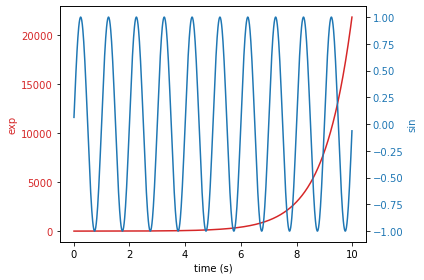

In [3]:
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)
ax1, ax2 = plotyy(t, data1, data2, ylabel1='exp', ylabel2='sin', xlabel='time (s)')


In [22]:
mnist  = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
input_shape = train_images.shape[1:]
print(input_shape)

(28, 28)


In [12]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Text(0.5, 1.0, 'Label = 3')

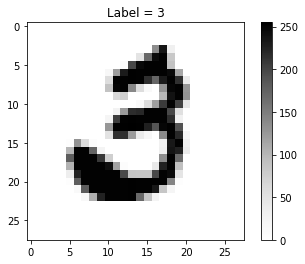

In [17]:
idx = 55893
plt.figure()
plt.imshow(train_images[idx], cmap='Greys')
plt.colorbar()
plt.title("Label = {:}".format(train_labels[idx]))

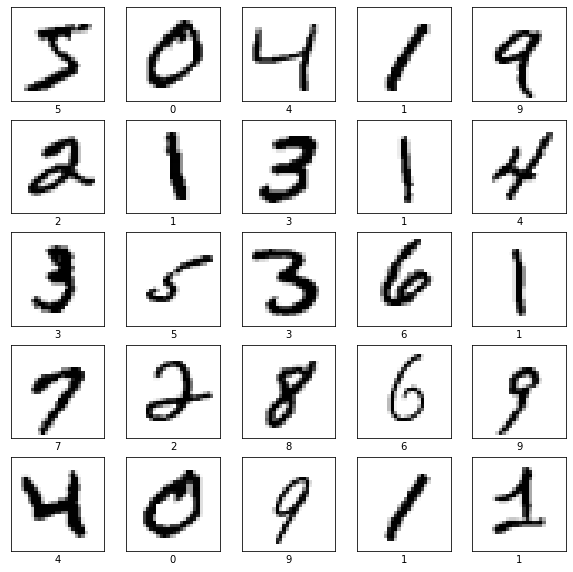

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [27]:
# https://keras.io/api/models/sequential/
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=input_shape),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [53]:
train_hist = model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 1s 367us/step - loss: 0.2484 - accuracy: 0.9360
Epoch 2/20
1875/1875 [==============================] - 1s 384us/step - loss: 0.2436 - accuracy: 0.93840s - loss: 0.238
Epoch 3/20
1875/1875 [==============================] - 1s 374us/step - loss: 0.2416 - accuracy: 0.9391
Epoch 4/20
1875/1875 [==============================] - 1s 367us/step - loss: 0.2390 - accuracy: 0.9388
Epoch 5/20
1875/1875 [==============================] - 1s 432us/step - loss: 0.2314 - accuracy: 0.9406
Epoch 6/20
1875/1875 [==============================] - 1s 449us/step - loss: 0.2324 - accuracy: 0.9404
Epoch 7/20
1875/1875 [==============================] - 1s 386us/step - loss: 0.2293 - accuracy: 0.9416
Epoch 8/20
1875/1875 [==============================] - 1s 363us/step - loss: 0.2325 - accuracy: 0.9415
Epoch 9/20
1875/1875 [==============================] - 1s 352us/step - loss: 0.2320 - accuracy: 0.9412
Epoch 10/20
1875/1875 [=========================

(<AxesSubplot:ylabel='Loss'>,
 <AxesSubplot:label='d6d506ca-a449-49f0-8c36-1d147a3e4eae', ylabel='Acc'>)

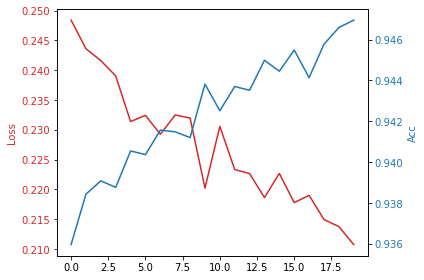

In [55]:
train_hist.history
plotyy(np.arange(20), train_hist.history['loss'], train_hist.history['accuracy'],
      ylabel1='Loss', ylabel2='Acc')

In [56]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 285us/step - loss: 0.3499 - accuracy: 0.9319


<BarContainer object of 10 artists>

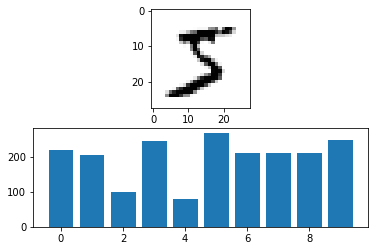

In [57]:
idx = 0
ex_img = train_images[idx:idx+1]
ex_out = model.predict(ex_img)
plt.subplot(2,1,1)
plt.imshow(ex_img[0,:,:], cmap='Greys')

plt.subplot(2,1,2)
plt.bar(np.arange(10), ex_out[0])


In [59]:
for i,l  in enumerate(model.layers):
    print(f"Layer {i} is {l.name}.  Has weights <", end='')
    for w in l.get_weights():
        print(f"{w.shape}; ", end='')
    print(">") # add newline

Layer 0 is flatten_3.  Has weights <>
Layer 1 is dense_4.  Has weights <(784, 32); (32,); >
Layer 2 is dense_5.  Has weights <(32, 10); (10,); >


In [61]:
for w in model.weights:
    print(f"Type is {type(w)} and shape is {w.shape}")

Type is <class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'> and shape is (784, 32)
Type is <class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'> and shape is (32,)
Type is <class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'> and shape is (32, 10)
Type is <class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'> and shape is (10,)


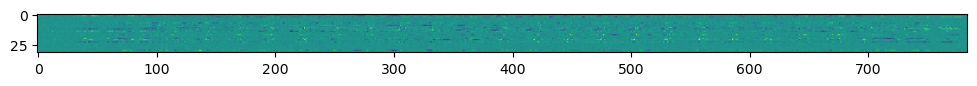

In [62]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
wts1 = model.layers[1].get_weights()[0]
plt.imshow(wts1.transpose())

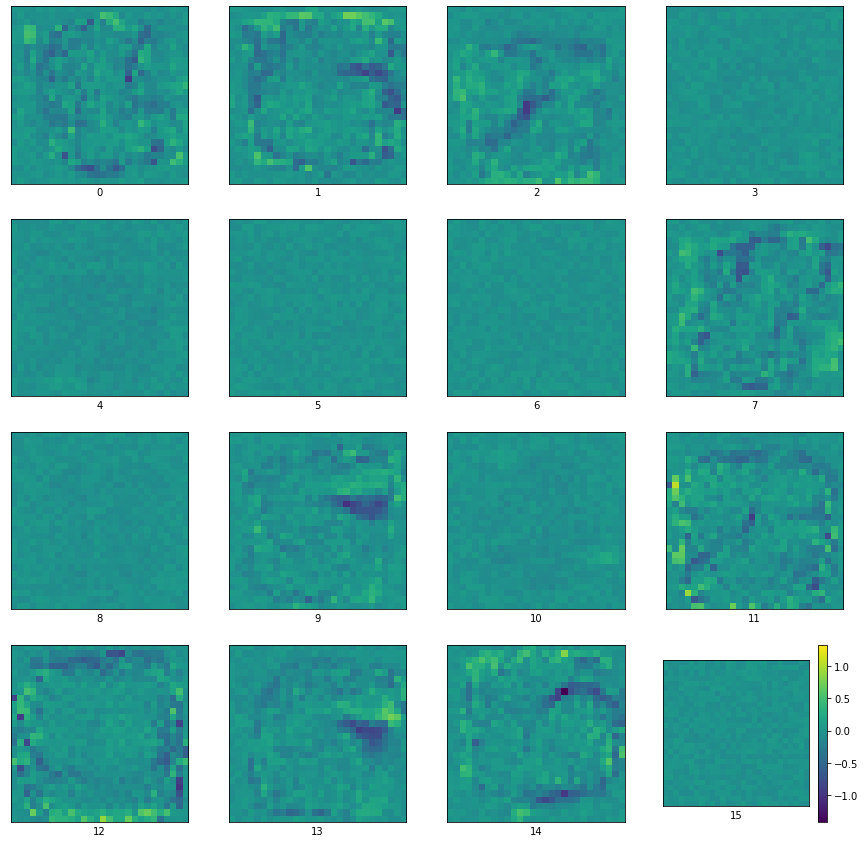

In [63]:
plt.figure(figsize=(15,15))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(wts1[:,i].reshape(28,28), vmin=np.min(wts1), vmax=np.max(wts1))
    plt.xlabel(i)
plt.colorbar()

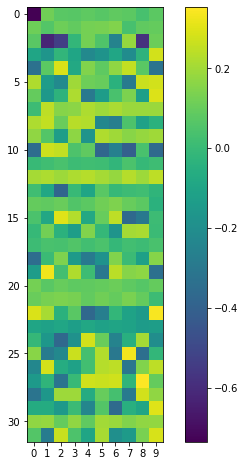

In [64]:
plt.figure(figsize=(8,8))
wts2 = model.layers[2].get_weights()[0]
plt.imshow(wts2)
plt.xticks(np.arange(10));
plt.colorbar()

In [65]:
int_model = tf.keras.Model(inputs=model.input, outputs=model.layers[1].output)
int_out = int_model.predict(train_images[0:1])

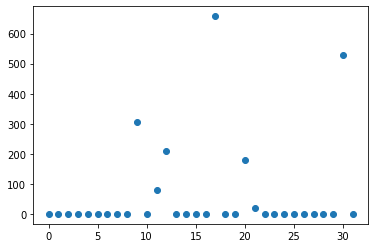

In [70]:
plt.plot(int_out.squeeze(), 'o')

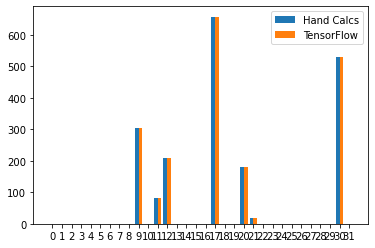

In [75]:
wts1 = model.layers[1].get_weights()[0]
bias1 = model.layers[1].get_weights()[1]
img_flat = train_images[0].flatten()
int_hand = np.maximum(0, np.matmul(wts1.transpose(), img_flat)+bias1)
grouped_bar([int_hand, int_out.squeeze()], ['Hand Calcs', 'TensorFlow'])